## Логистическая регрессия

In [1217]:
# Срок сдачи: 7 декабря 2023 года 10:00, далее -4 балла

 Моделирование принятия решения о финансировании проекта венчурным фондом

In [1218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1219]:
data=pd.read_excel('data_seminar11.xlsx')

### Описание переменных

__Result__ - проект поддержан фондом (0-нет, 1 –да);
***
__age__ - возраст руководителя;  
__compet__ -оценка уровня конкуренции (1-5);  
__complexity__- оценка технологической сложности проекта (1-5);  
__cost__- объем денежных средств, необходимых для поддержки проекта, млн. руб.;  
__eco__- влияние используемой технологии на окружающую среду (0-негативное, 5-нейтральное, 10- экологичное решение);  
__fin_support__ - финансовая поддержка правительства;  
__foreigners__- наличие иностранных участников (1- есть, 0 –нет);

__investors__ - количество инвесторов;   
__market__- наиболее важный рынок сбыта 1- местный, региональный, 2-общероссийский, 3-стран СНГ, 4 – европейский, 5 –другие;  
__non-discl__- наличие соглашений о неразглашении (с персоналом или партнерами);  
__npv__- чистая приведенная стоимость проекта, млн. руб.;  
__own_res__ - доля собственных ресурсов, %;  
__patent__ - существует ли возможность получения патента (1-существует, 0-нет);  
__phd__ - доля персонала с ученой степенью;  

__potential__ - оценка потенциала рынка (% возможной доли рынка);  
__pp__- срок окупаемости проекта, мес.;  
__rd__ - потребность в проведении дополнительных исследований и разработок (0-нет, 1- необходимы);  
__risks__ - экспертная оценка рисков проекта (1-10);  
__stage__ - стадия реализации проекта (1-5);  
__success__- количество успешных проектов у руководителя;  
__support__ - нефинансовая поддержка правительства (льготные условия для аренды помещений, земли, приобретения лицензий);   
__unic__ - уникальность технологии (1- технология уникальна, 0- технология известна на рынке).

In [1220]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Result,1458.0,0.235940,0.424730,0.00,0.000000,0.000000,0.000000,1.000000
stage,1392.0,15.957615,20.023324,1.00,3.000000,4.000000,40.000000,64.000000
cost,1458.0,11.173663,7.148868,0.40,5.700000,10.000000,15.300000,39.000000
patent,1458.0,0.120027,0.325105,0.00,0.000000,0.000000,0.000000,1.000000
rd,1458.0,5.687243,73.882121,0.00,0.000000,0.000000,0.000000,1000.000000
eco,1458.0,4.283265,2.509558,0.00,5.000000,5.000000,5.000000,10.000000
npv,1387.0,7.870995,5.494646,0.22,3.405000,6.800000,10.995000,34.220000
pp,1387.0,47.795242,28.582781,4.00,26.000000,43.000000,63.000000,149.000000
phd,1347.0,0.205791,0.367084,0.00,0.000000,0.000000,0.300000,1.600000
foreigners,1458.0,0.126886,0.332960,0.00,0.000000,0.000000,0.000000,1.000000


In [1221]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Result,1458.0,0.24,0.42,0.00,0.00,0.00,0.00,1.00
stage,1392.0,15.96,20.02,1.00,3.00,4.00,40.00,64.00
cost,1458.0,11.17,7.15,0.40,5.70,10.00,15.30,39.00
patent,1458.0,0.12,0.33,0.00,0.00,0.00,0.00,1.00
rd,1458.0,5.69,73.88,0.00,0.00,0.00,0.00,1000.00
eco,1458.0,4.28,2.51,0.00,5.00,5.00,5.00,10.00
npv,1387.0,7.87,5.49,0.22,3.40,6.80,11.00,34.22
pp,1387.0,47.80,28.58,4.00,26.00,43.00,63.00,149.00
phd,1347.0,0.21,0.37,0.00,0.00,0.00,0.30,1.60
foreigners,1458.0,0.13,0.33,0.00,0.00,0.00,0.00,1.00


In [1222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Result       1458 non-null   int64  
 1   stage        1392 non-null   float64
 2   cost         1458 non-null   float64
 3   patent       1458 non-null   int64  
 4   rd           1458 non-null   int64  
 5   eco          1458 non-null   int64  
 6   npv          1387 non-null   float64
 7   pp           1387 non-null   float64
 8   phd          1347 non-null   float64
 9   foreigners   1458 non-null   int64  
 10  university   1458 non-null   int64  
 11  market       1458 non-null   int64  
 12  risks        1458 non-null   int64  
 13  own_res      1458 non-null   float64
 14  unic         1293 non-null   float64
 15  potential    1458 non-null   float64
 16  fin_support  1458 non-null   int64  
 17  age          1425 non-null   float64
 18  success      1458 non-null   int64  
 19  compet

In [1223]:
data["Result"].value_counts()

0    1114
1     344
Name: Result, dtype: int64

In [1224]:
data.isnull().sum()

Result           0
stage           66
cost             0
patent           0
rd               0
eco              0
npv             71
pp              71
phd            111
foreigners       0
university       0
market           0
risks            0
own_res          0
unic           165
potential        0
fin_support      0
age             33
success          0
compet           0
investors        0
support          0
complexity       0
non_discl        0
dtype: int64

In [1225]:
# Поиск абсолютных дубликатов
data.duplicated().sum()

0

In [1226]:
data.head()

,Result,stage,cost,patent,rd,eco,npv,pp,phd,foreigners,...,unic,potential,fin_support,age,success,compet,investors,support,complexity,non_discl
0,0,4.0,3.5,0,0,5,0.89,46.0,0.1,0,...,0.0,0.17,0,39.0,0,1,10,0,2,0
1,0,2.0,13.3,0,1,0,13.37,66.0,0.2,0,...,0.0,0.16,0,36.0,2,1,3,0,3,0
2,1,4.0,5.2,0,0,5,11.73,12.0,0.2,0,...,0.0,0.17,0,46.0,1,3,2,0,3,0
3,0,5.0,7.4,0,0,5,9.72,38.0,0.2,0,...,0.0,0.22,0,45.0,3,1,2,0,2,0
4,0,3.0,4.0,0,0,5,24.77,85.0,0.3,0,...,1.0,0.53,0,55.0,5,1,7,0,4,0


# Исправление ошибок в данных

In [1227]:
(data.phd > 1).sum()

52

In [1228]:
((data.rd != 0) & (data.rd != 1)).sum()

8

In [1229]:
((data.stage < 1) | (data.stage > 5)).sum()

410

In [1230]:
data.success.sort_values(ascending=False)[:3]

340    265653
545    265652
394    265651
Name: success, dtype: int64

Список данных, содержащих ошибки:

- phd - существуют 49 наблюдений > 1, несмотря на то, что это доля

- rd - для бинарной переменной есть 8 ошибочных наблюдения (не 0 и не 1)

- stage - сущетвуют 185 наблюдений вне диапазона от 1 до 5

- success - есть 3 аномально больших наблюдения, исходя из логических соображений, являющиеся ошибкой

- пропуски в переменных stage, npv, pp, phd, unic, age

In [1231]:
# Ваш код для исправления ошибок в данных (без удаления наблюдений)

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from typing import List, Union

data_sterile = data[(data.phd <= 1) & (data.rd <= 1) & (data.stage <= 5) & (data.success < 50)].dropna()

# Функция для проверки условия адекватности с использованием eval
def check_adequacy_condition(data: pd.Series, condition: str) -> pd.Series:
    """
    Применяет строковое условие к Series данных.

    :param data: Series для проверки.
    :param condition: Строковое условие, например "x > 3" или "x < 1".
    :return: Серия булевых значений, указывающих, соответствует ли каждая строка условию.
    """
    try:
        # Безопасное выполнение условия с использованием eval
        safe_globals = {"__builtins__": {}}
        safe_locals = {"x": data}
        return eval(condition, safe_globals, safe_locals)
    except SyntaxError as e:
        raise ValueError(f"Ошибка в синтаксисе условия: {e}")
    except Exception as e:
        raise ValueError(f"Ошибка при выполнении условия: {e}")

# Функция для получения подстановочных данных
def get_substitution(
    data_sterile: pd.DataFrame,
    data: pd.DataFrame,
    var_name: str,
    type_: Union[RandomForestClassifier, RandomForestRegressor],
    inadequacy_clauses: List[str] = None
) -> pd.Series:
    """
    Выводит замену для "неадекватных" и пропущенных значений на основе указанной модели.

    :param data_sterile: Очищенные данные, которые будут использоваться для обучения.
    :param data: Исходный датафрейм.
    :param var_name: Имя переменной для подстановки.
    :param inadequacy_clauses: Список условий неадекватности для проверки или None.
    :param type_: Тип модели (классификатор или регрессор).
    :return: Серия с подстановочными значениями.
    """
    try:
        X_train, y_train = data_sterile.drop(var_name, axis=1), data_sterile[var_name]

        # Проверка наличия условий неадекватности
        if inadequacy_clauses:
            # Применяем каждое условие к данным
            bad_data_conditions = pd.Series([False] * len(data))
            for clause in inadequacy_clauses:
                condition = f"x {clause}"
                bad_data_conditions |= check_adequacy_condition(data[var_name], condition)
            bad_data = data[bad_data_conditions | data[var_name].isna()]
        else:
            # Если условия не указаны, считаем все данные адекватными
            bad_data = data[data[var_name].isna()]

        X_subst = bad_data.drop(var_name, axis=1)

        X_subst = X_subst.fillna(X_subst.median())
        
        # Если все значения переменной состоят из nan, удалю её
        if X_subst.isna().any().any():
                empty_cols = X_subst.columns[X_subst.isna().all()]
                X_train = X_train.drop(columns=empty_cols)
                X_subst = X_subst.drop(columns=empty_cols)

        type_.fit(X_train, y_train)
        subst = pd.Series(type_.predict(X_subst), index=X_subst.index, name=var_name)

        return subst
    except Exception as e:
        raise ValueError(f"Ошибка при получении подстановочных данных: {e}")

In [1232]:
# Заполню ошибки и пропущенные значения в данных

clf = RandomForestClassifier(random_state=0)
rg = RandomForestRegressor(random_state=0)

for subst in [
    # Обработка пропусков и "неадекватных" значений
    get_substitution(data_sterile, data, 'rd', clf, ['> 1', '< 0']),
    get_substitution(data_sterile, data, 'stage', clf, ['> 5', '< 0']),
    get_substitution(data_sterile, data, 'phd', rg, ['> 1', '< 0']),
    get_substitution(data_sterile, data, 'success', rg, ['> 50', '< 0']).astype(int),
    # Обработка пропусков
    get_substitution(data_sterile, data, 'unic', clf),
    get_substitution(data_sterile, data, 'npv', rg),
    get_substitution(data_sterile, data, 'pp', rg).astype(int),
    get_substitution(data_sterile, data, 'age', rg).astype(int)
]:
    data.loc[subst.index, subst.name] = subst

data_sterile = data[(data.phd <= 1) & (data.rd <= 1) & (data.stage <= 5) & (data.success < 50)].dropna()

if data.equals(data_sterile):
    print('Мы получили данные без ошибок и пропущенных значений')

Мы получили данные без ошибок и пропущенных значений


## 2. Предварительный анализ данных

1. Построить диаграммы распределений stage и совместных распределений stage c Result, а также stage с другими 
    параметрами. Дать интерпретацию полученным результатам.  
2. Построить диаграммы распределений cost и совместных распределений cost c Result, а также cost с другими  
    параметрами. Дать интерпретацию полученным результатам.  
3. Построить диаграммы распределений npv и совместных распределений npv c Result, а также npv с другими  
    параметрами. Дать интерпретацию полученным результатам. 

## stage

<Axes: xlabel='stage', ylabel='count'>

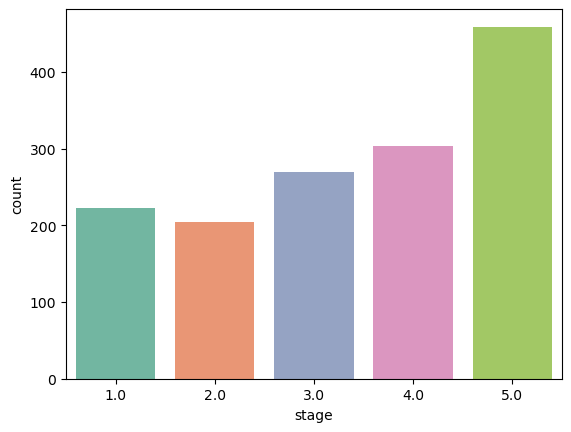

In [1233]:
sns.countplot(data=data, x='stage', palette='Set2')

Видно, что проектов на 5той стадии реализации больше всего, а на первой и второй - меньше всего

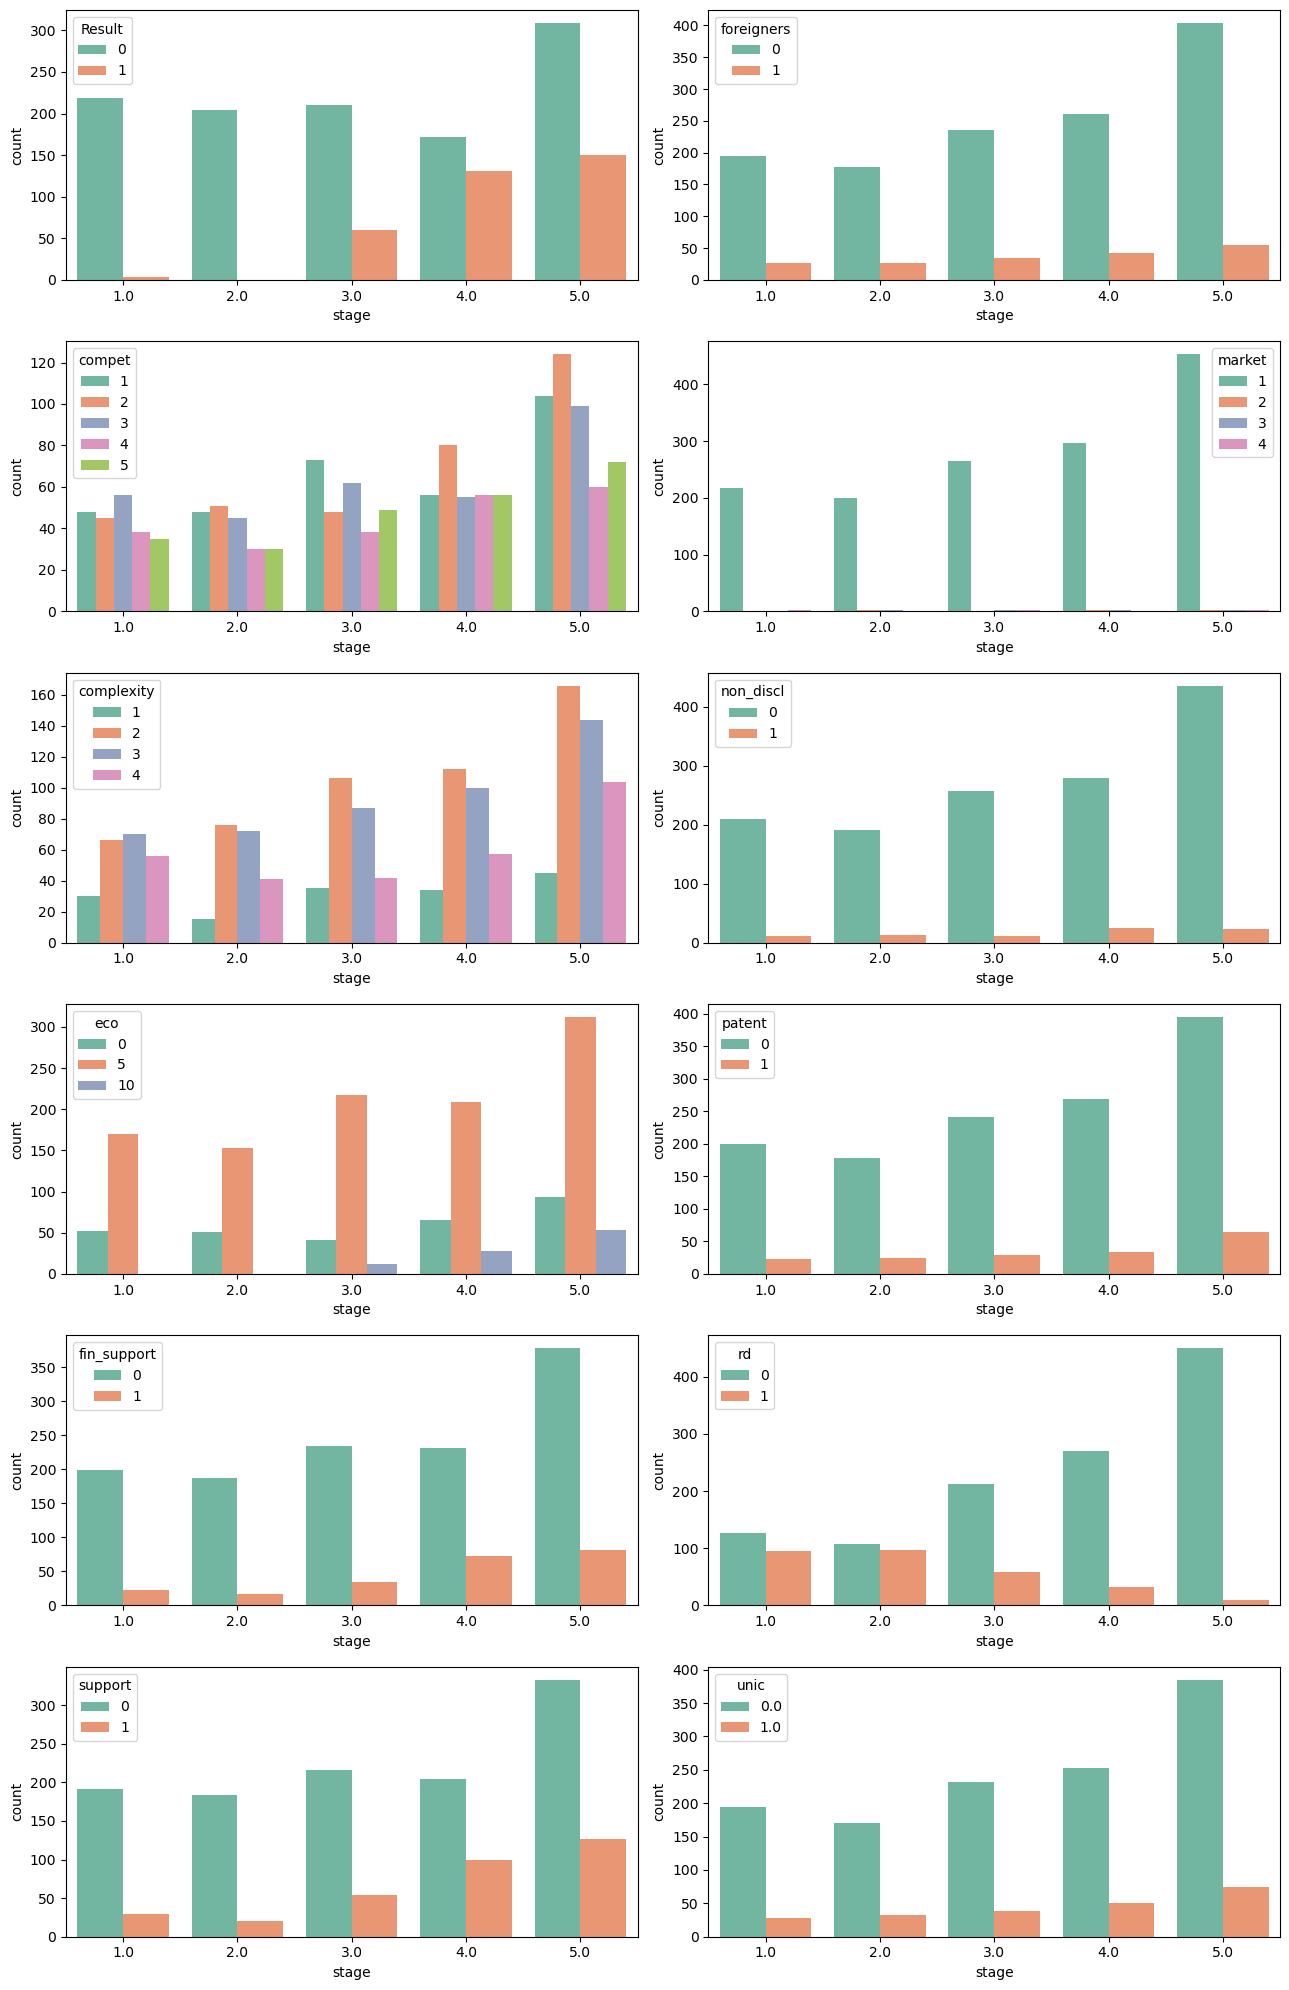

In [1234]:
variables = ['Result', 'compet', 'complexity', 'eco', 'fin_support', 'support', 'foreigners', 'market', 'non_discl', 'patent', 'rd', 'unic']

fig, ax = plt.subplots(6, 2, figsize=(13, 20))

for i, name in enumerate(variables):
    row = i % 6 
    col = i // 6 
    sns.countplot(data=data, x='stage', hue=name, ax=ax[row, col], palette='Set2')

plt.tight_layout()
plt.show()

- Видно, что проекты на 1 и на 2 стадии реализации не поддерживаются фондом
- Потребность проводить дополнительные исследования пропадают для проектов на последних стадиях
- Нет экологичных проектов на начальных стадиях
- К последним стадиям уменьшается доля проектов с высокой конкуренцией

## cost

<Axes: xlabel='cost'>

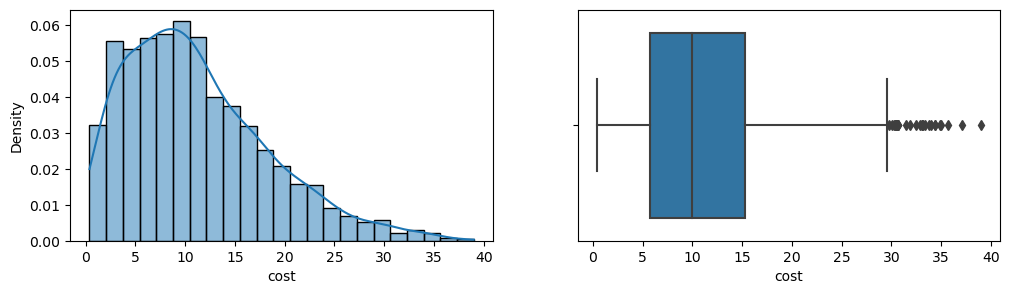

In [1236]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
sns.histplot(data=data, x='cost', stat='density', ax=ax[0], kde=True)
sns.boxplot(data=data, x='cost', ax=ax[1])

- Видна самая высокая концентрация наблюдений с необходимыми средствами в районе 10 млн. руб.
- Большой хвост в сторону высоких значений. Самым же высоким является значение чуть ниже 40 млн. руб.

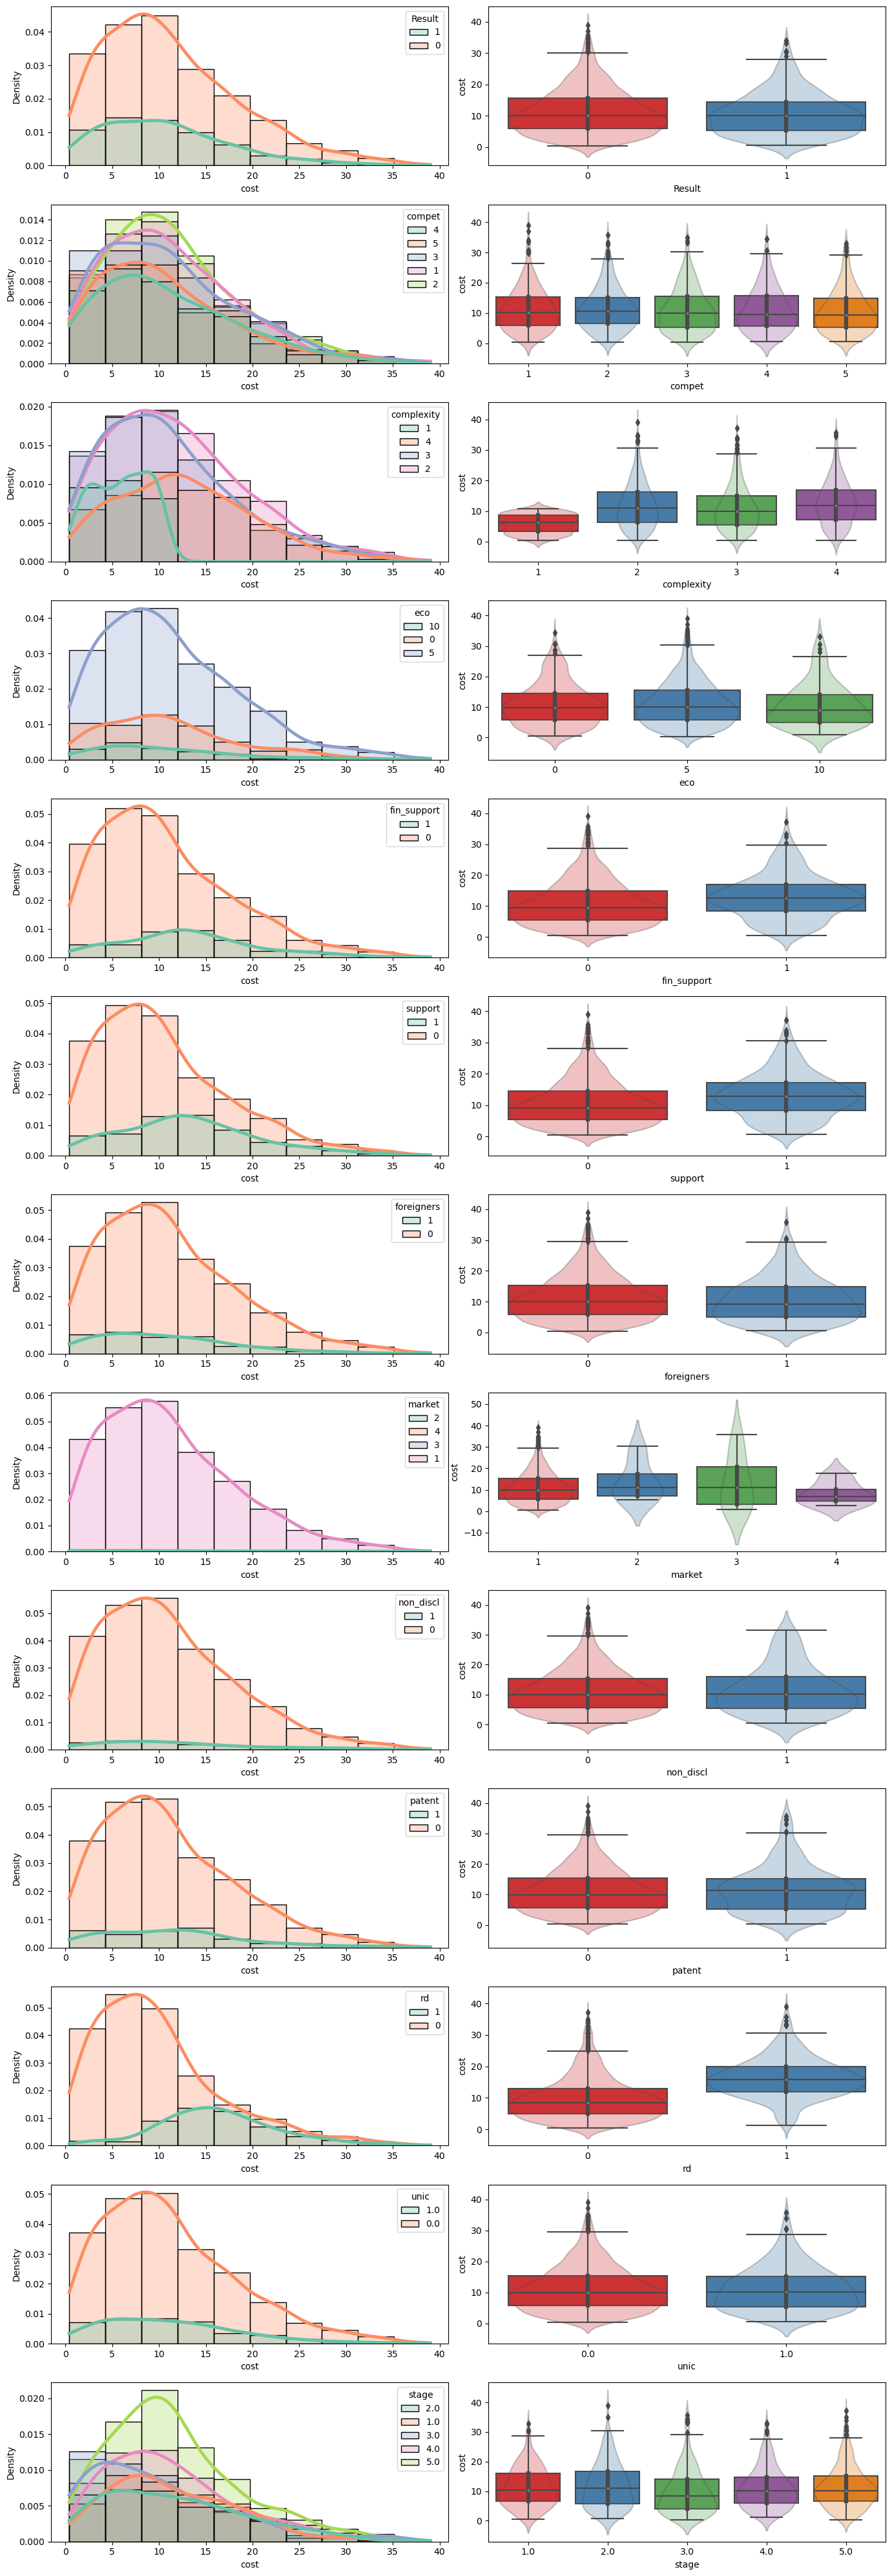

In [1237]:
variables = ['Result', 'compet', 'complexity', 'eco', 'fin_support', 'support', 'foreigners', 'market', 'non_discl', 'patent', 'rd', 'unic', 'stage']

fig, ax = plt.subplots(len(variables), 2, figsize=(14, 40))

for i, name in enumerate(variables):
    counts = data[name].value_counts().sort_values()

    sns.histplot(data=data, x='cost', hue=name, ax=ax[i, 0], stat='density', palette='Set2', bins=10, hue_order=counts.index, kde=True, alpha=0.3, line_kws={'linewidth':3.5})
    sns.boxplot(data=data, y='cost', x=name, ax=ax[i, 1], palette='Set1')

    vp = sns.violinplot(data=data, y='cost', x=name, ax=ax[i, 1], palette='Set1')

    for art in vp.collections:
        art.set_alpha(0.3) 

plt.tight_layout()
plt.show()

- Видно, что распределение "cost" почти не зависит от того, поддержан ли фонд или нет. Скорее всего фонд не смотрит на необходимый объём средств для проекта.
- Мы видим, что если необходимы дополнительные исследования, необходимый объём денежных средств в среднем выше
- Проектам с низкой технологической сложностью не нужен объём денежных средств выше 13 млн. руб.

## npv

<Axes: xlabel='npv'>

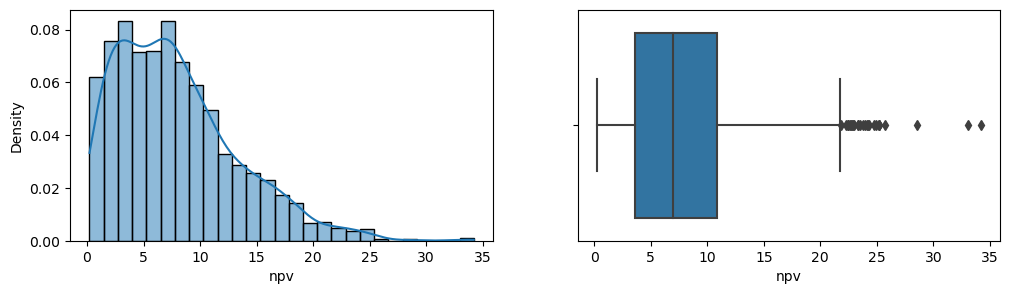

In [1238]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
sns.histplot(data=data, x='npv', stat='density', ax=ax[0], kde=True)
sns.boxplot(data=data, x='npv', ax=ax[1])

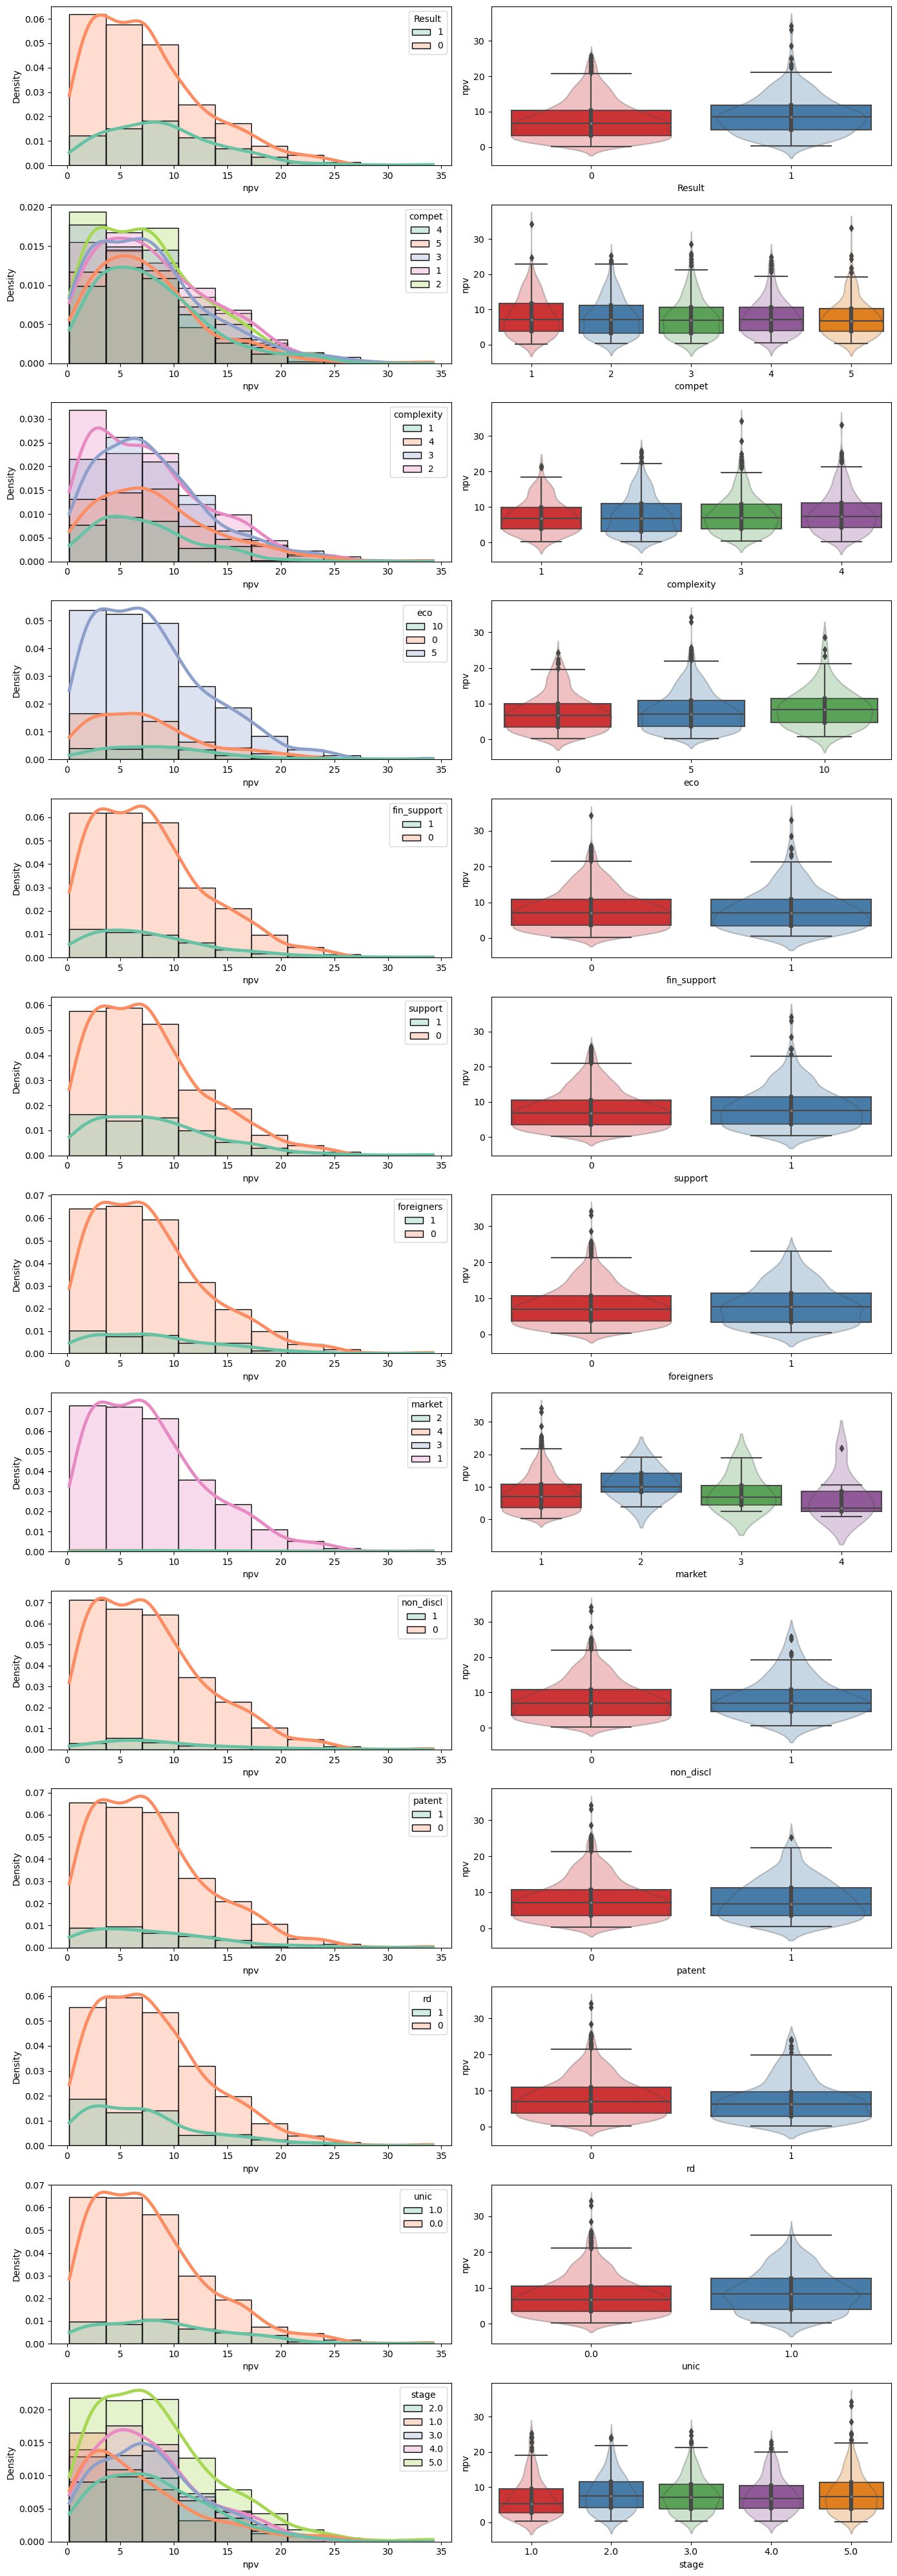

In [1239]:
variables = ['Result', 'compet', 'complexity', 'eco', 'fin_support', 'support', 'foreigners', 'market', 'non_discl', 'patent', 'rd', 'unic', 'stage']

fig, ax = plt.subplots(len(variables), 2, figsize=(14, 40))

for i, name in enumerate(variables):
    counts = data[name].value_counts().sort_values()

    sns.histplot(data=data, x='npv', hue=name, ax=ax[i, 0], stat='density', palette='Set2', bins=10, hue_order=counts.index, kde=True, alpha=0.3, line_kws={'linewidth':3.5})
    sns.boxplot(data=data, y='npv', x=name, ax=ax[i, 1], palette='Set1')

    vp = sns.violinplot(data=data, y='npv', x=name, ax=ax[i, 1], palette='Set1')

    for art in vp.collections:
        art.set_alpha(0.3) 

plt.tight_layout()
plt.show()

- Видно, что от высокой приведённой стоимости проекта, вероятность того, что проект окажется поддержан фондом чуть выше
- Видно, что самые дорогие проекты - общероссийские, а самые дешёвые - с европейским рынком сбыта (удивительно)
- От уровня конкуренции стоимость проекта совсем не зависит (эмпирический вывод).  

## 3. Обучение логистической регрессии с нормировкой MinMax

In [1240]:
data.dropna(inplace=True)

y=data.Result
X=data.drop(columns=['Result'])

In [1241]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X)
X_minmax=scaler_minmax.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))

from sklearn.metrics import roc_auc_score
print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix : 
 [[355  18]
 [ 33  76]]
Accuracy :  0.8941908713692946
Roc-auc score: 
 0.8244951668839314


In [1242]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_minmax)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277256
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.493      
Dependent Variable: Result           AIC:              854.4771   
Date:               2023-12-07 03:21 BIC:              976.0280   
No. Observations:   1458             Log-Likelihood:   -404.24    
Df Model:           22               LL-Null:          -796.58    
Df Residuals:       1435             LLR p-value:      9.8725e-152
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1         1.7446     0.3081     5.6615   0.0000    1.1406    2.3485
x2        -1.6458     0.6183    -2.6618   0.0

## 4. Обучение логистической регрессии с нормировкой StandardScaler

In [1243]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_standard=scaler_standard.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
clf_standard=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_standard = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

from sklearn.metrics import roc_auc_score
print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

Confusion Matrix : 
 [[354  19]
 [ 31  78]]
Accuracy :  0.8962655601659751
Roc-auc score: 
 0.8323289962368104


## 5. Feature selection

В этом пунке необходимо выполнить отбор 5 наиболее значимых переменных. Отбор может осуществляться на основании:
- интуиции;
- оценки корреляций переменных;
- алгоритмов feature selection (sklearn.feature_selection).

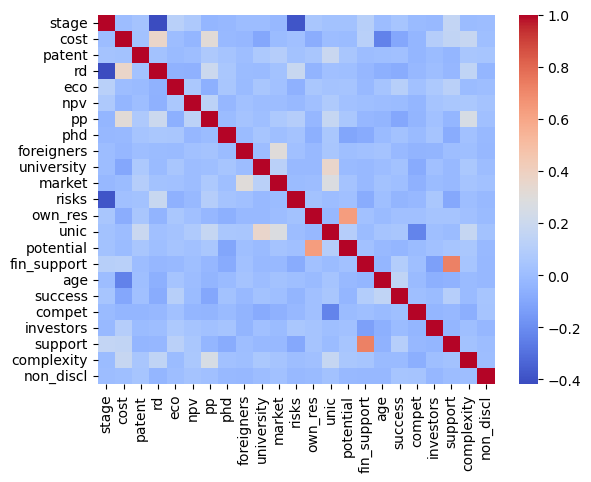

In [1244]:
sns.heatmap(X.corr(), cmap='coolwarm');

In [1245]:
pd.DataFrame(data=dict(features=X.columns, coefficients=clf_standard.coef_[0])).sort_values('coefficients', \
                                                                                        ascending=False)

,features,coefficients
4,eco,0.501420
0,stage,0.491856
20,support,0.482409
17,success,0.310486
13,unic,0.210040
5,npv,0.200222
12,own_res,0.115432
15,fin_support,0.078038
9,university,0.067494
22,non_discl,0.059647


In [1246]:
from sklearn.feature_selection import RFE

scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_standard=scaler_standard.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=42)

rfe = RFE(
    estimator=LogisticRegression(
        random_state=0, 
        solver='lbfgs', 
        multi_class='multinomial'
    ), 
    n_features_to_select=5
)

rfe = rfe.fit(X_train, y_train)
X.columns[rfe.support_]

Index(['stage', 'eco', 'pp', 'success', 'support'], dtype='object')

In [1247]:

selected_cols = [
    'stage',
    'eco',
    'pp',
    'success',
    'support'
]

def Selector(df_in):
    assert len(selected_cols) == 5
    return df_in[selected_cols]

In [1248]:
for feature in X.columns:
    if feature in selected_cols:
        print(f"True - {feature}")
    else:
        print(f"False - {feature}")

True - stage
False - cost
False - patent
False - rd
True - eco
False - npv
True - pp
False - phd
False - foreigners
False - university
False - market
False - risks
False - own_res
False - unic
False - potential
False - fin_support
False - age
True - success
False - compet
False - investors
True - support
False - complexity
False - non_discl


### 6. Обучение логистической регрессии с отобранными признаками

In [1249]:
X = X[selected_cols]

scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_standard=pd.DataFrame(scaler_standard.transform(X), columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=42)

clf_standard=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_standard = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

from sklearn.metrics import roc_auc_score
print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

from sklearn.metrics import recall_score, precision_score
print ('recall_score: \n', recall_score(y_test, y_pred_standard))
print ('precision_score: \n', precision_score(y_test, y_pred_standard))

Confusion Matrix : 
 [[354  19]
 [ 43  66]]
Accuracy :  0.8713692946058091
Roc-auc score: 
 0.7772831246771773
recall_score: 
 0.6055045871559633
precision_score: 
 0.7764705882352941


In [1250]:
import statsmodels.api as sm
logit_model=sm.Logit(y,sm.add_constant(X_standard))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.299927
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.451      
Dependent Variable: Result           AIC:              886.5878   
Date:               2023-12-07 03:21 BIC:              918.2967   
No. Observations:   1458             Log-Likelihood:   -437.29    
Df Model:           5                LL-Null:          -796.58    
Df Residuals:       1452             LLR p-value:      4.7142e-153
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -2.1564     0.1206   -17.8826   0.0000   -2.3928   -1.9201
stage      1.0768     0.1129     9.5408   0.0

- На любом разумном уровне значимости, модель будет значимо отличаться от наивной. 
- Все коэффициенты значимо отличны от нулья на любом разумном уровне значимости
- Результаты говорят о том, что модель обладает хорошей точностью, но 60% полнотой, что может говорить о несовершенстве модели
- Также pseudo R^2 0.451, что может подтверждать то же самое
- При этом, доля верных ответов модели составляет 87.1 %

### 7. Интерпретация полученной модели

Вероятность получить поддержку фонда возрастает, если:
- Проект находится на конечной стадии
- Проект экологичен
- У руководителя уже есть успешные проекты
- Правительство поддерживает проект

Вероятность получить поддержку уменьшается, если:
- У проекта большой срок окупаемости